# Домашнее задание 2. Классификация, детекция.

Оценка за часть 1 и часть 2 в этом дз -- по 5 баллов.

Выполнила **Александра Романенко** (ИАД-4) и, надеюсь, в этот раз загрузила нужный файл с первого раза ¯\_(ツ)_/¯


## Часть 1. Классификация

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в датасете есть. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train и val, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат собственно сами изображения.
 
__Задание__. Добейтесь accuracy **не менее 0.44**. Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи/блогпосты/вопросы на stackoverflow/видосы от (индийских) ютуберов/курсы/подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

В коде ниже необходимо, чтобы код проходил все `assert`'ы.

Необходимо написать функцию `predict` по шаблону ниже. Эта функция принимает на вход модель, даталоадер с валидационнами данными, criterion для подсчёта лосса и device, на котором будут производиться вычисления (определён ниже) и возвращает список лоссов по всем объектам, список из предсказанных классов для каждого объекта из из даталоалера и список из настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено__. Можно использовать предобученные модели из `torchvision`.

__Критерии оценки__: Оценка вычисляется по простой формуле: min(5, 5 * Ваша accuracy / 0.44). Оценка округляется до десятых по арифметическим правилам.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать на защите :)
 - Используйте аугментации. Для этого пользуйтесь модулем torchvision.transforms или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - (ещё раз) Можно файнтюнить предобученные модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом ImageFolder), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы отладить код, пробуйте обучаться на маленькой части датасета. Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать гпу. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

## ------------------------------------------------------------------------------------------
Я долго пыталась с яндексом, но легче оказалось закинуть на дропбокс:)

In [1]:
! wget https://www.dropbox.com/s/pyfe9tqzjkvvaxu/dataset.zip?dl=0
! unzip -q dataset.zip?dl=0

--2020-11-26 13:29:00--  https://www.dropbox.com/s/pyfe9tqzjkvvaxu/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pyfe9tqzjkvvaxu/dataset.zip [following]
--2020-11-26 13:29:01--  https://www.dropbox.com/s/raw/pyfe9tqzjkvvaxu/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca1402210c6c5f49f39ded2d04c.dl.dropboxusercontent.com/cd/0/inline/BD4dNBYiS-SCoS9OCWGXW8ngkQ6CwBTy3a-O8qqtj6tBXLUG4ww1lD4--KEBNrsLOXwTCI-CKreaNO5mM747ysJV4pKs_YLLV1lLcI6VXkkWdQ00nDTrSMYzmv2QiFR4xqQ/file# [following]
--2020-11-26 13:29:01--  https://uca1402210c6c5f49f39ded2d04c.dl.dropboxusercontent.com/cd/0/inline/BD4dNBYiS-SCoS9OCWGXW8ngkQ6CwBTy3a-O8qqtj6tBXLUG4ww1lD4--KEBNrsLOXwTCI-CKreaNO5mM747ysJV4pKs_YLLV1lLcI6VXkkWd

Проверим, что в папочке все нормик:

In [2]:
!ls ./dataset/dataset

train  val


Я решила не писать класс MyDataset, а воспользоваться имэджфолдером, как на семинаре

In [3]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
import numpy as np
# You may add any imports you need

import random
import glob
import sys

import torchvision.models
from torchvision.datasets import ImageFolder
from torchvision.transforms import Resize, Normalize, ToTensor, Compose

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

В привычной манере, прём красивый готовый код с семинаров (намбер 5) =)

In [4]:
train_transform = Compose([Resize((224, 224)), ToTensor(), Normalize((0.5, 0.5, 0.5), (1, 1, 1)), ])
val_transform = Compose([Resize((224, 224)), ToTensor(), Normalize((0.5, 0.5, 0.5), (1, 1, 1)), ])
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = ImageFolder("./dataset/dataset/train", transform=train_transform)
val_dataset = ImageFolder("./dataset/dataset/val", transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset -- И Я ТАКИ ТАК И СДЕЛАЮ!)

In [5]:
# Just very simple checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


УРАААААААААА!!!!! тестс пассд!!!!

In [6]:
import tqdm
from sklearn.metrics import accuracy_score

def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0", return_accuracy=False):
    #model.train()
    model = model.to(device).train() # немного меняю исходную, переношу на куду
    # готовим почву для всех метрик, которые будут считаться
    total_loss = 0
    num_batches = 0
    all_losses = []
    total_predictions = np.array([])
    total_labels = np.array([])
    for images, labels in train_dataloader:
        # Переносим батч на ГПУ
        images = images.to(device)
        labels = labels.to(device)
        # Получаем результаты модели
        predicted = model(images)
        # Узнаем и запоминаем лосс
        loss = criterion(predicted, labels)
        # Update weights and optimizer operations
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        # Узнаем и запечатляем все метрики в тоталах
        total_loss += loss.item()
        total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
        total_labels = np.append(total_labels, labels.cpu().detach().numpy())
        num_batches += 1
        all_losses.append(loss.detach().item())
    
    # Подсчет и вывод аккураси
    accuracy_train = accuracy_score(total_labels, total_predictions) # беру аккураси скор, потому что дальше в ассертах она и это и правда удобней)
    print("Accuracy_train:", round(accuracy_train * 100, 4))
    if return_accuracy:
      return accuracy_train, all_losses
    else:
      return all_losses


def predict(model, val_dataloader, criterion, device="cuda:0"):
    #model.eval()
    model.to(device).eval() # немного меняю исходную, переношу на куду
    # готовим почву для всех метрик, которые будут считаться
    total_loss = 0
    num_batches = 0
    total_predictions = np.array([])
    total_labels = np.array([])
    # Не буду писать комментарии дальше, все аналогично прошлой функции
    for images, labels in val_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        predicted = model(images)
        loss = criterion(predicted, labels)
        
        accuracy = (predicted.argmax(1) == labels).float().mean()
        total_loss += loss.item()
        total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
        total_labels = np.append(total_labels, labels.cpu().detach().numpy())
        num_batches += 1
    metrics = {'loss': total_loss / num_batches}
    accuracy_val = accuracy_score(total_predictions, total_labels)
    print("Accuracy_val:", round(accuracy_val * 100, 4) )
    #return losses, predicted_classes, true_classes 
    return total_loss, total_predictions, total_labels # изменяю изначальный ритерн, потому что переменные называла иначе


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=5, scheduler=None):
    model.to(device)
    train_losses = []
    eval_losses = []
    for epoch in tqdm.notebook.tqdm(range(n_epochs)):
        # Train, evaluate, print accuracy, make a step of scheduler or whatever you want... I WANNA DIE
        # Эпоха на трейне
        print(f"Train Epoch: {epoch}")
        train_loss = train_one_epoch(
            model=model,
            train_dataloader=train_dataloader,
            optimizer=optimizer,
            criterion=criterion
        )
        # Лосс на трейне сохранили
        train_losses.extend(train_losses)

        # Эпоха на вале
        print(f"Validation Epoch: {epoch}")
        with torch.no_grad():
            validation_loss, predicted_classes, true_classes = predict(
                model=model, 
                val_dataloader=val_dataloader, 
                criterion=criterion
                )
        # Лосс на вале сохранили
        eval_losses.append(validation_loss)

    return train_losses, eval_losses

Возьмем предобученный резнет, заморозим все параметры и обучим последний линейный слой:

In [7]:
 torchvision.models

<module 'torchvision.models' from '/usr/local/lib/python3.6/dist-packages/torchvision/models/__init__.py'>

In [8]:
from torchvision.models import resnet18

# Загрузить предобученную сеть 
model = resnet18(pretrained=True)
# Заморозим параметры
for param in model.parameters():
    param.requires_grad = False
# В нашем случае последний слой должен выдать 200 классов
model.fc = nn.Linear(512, 200)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [9]:
optimizer = torch.optim.Adam(model.fc.parameters(), 1e-4)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=150, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=150, shuffle=True)
criterion = nn.CrossEntropyLoss()
#scheduler = # LR SCHEDULE THAT YOU PROBABLY CHOOSE
n_epochs = 5
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

Простой тест на проверку правильности написанного кода

In [10]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

Accuracy_val: 0.57
tests passed


Снова ура!!!

Запустить обучение можно в ячейке ниже.

In [11]:
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs)

Train Epoch: 0
Accuracy_train: 15.992
Validation Epoch: 0
Accuracy_val: 33.49
Train Epoch: 1
Accuracy_train: 41.852
Validation Epoch: 1
Accuracy_val: 46.44
Train Epoch: 2
Accuracy_train: 49.755
Validation Epoch: 2
Accuracy_val: 50.91
Train Epoch: 3
Accuracy_train: 53.03
Validation Epoch: 3
Accuracy_val: 53.01
Train Epoch: 4
Accuracy_train: 55.02
Validation Epoch: 4
Accuracy_val: 54.52



([],
 [255.76101422309875,
  198.3425567150116,
  168.7301058769226,
  152.16828978061676,
  141.16572976112366])

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, запустите функцию evaluate. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [12]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5*accuracy / 0.44)))

Accuracy_val: 54.52
Оценка за это задание составит 5 баллов


__Ваш отчёт о проделанных экспериментах__: сначала я писала модель сама, но оказалось, что качество выходит слишком низкое для задания, возможно, требовались серьезные усложнения, но не вышло. Если брать предобученный резнет, как в семинаре, и обучать его полностью, то качество оказывается хуже, кроме того, модель быстрее переобучается. Лучше всего зашла штука с предобученным резнетом18 и обучением последнего слоя, так модель дает наилучшее качество за 4-6 эпох, потом может начинать переобучаться. Очень, конечно, неожиданно, что семинарский вариант оказался настолько крут, но очень приятно:)

Полученная accuracy вроде покрывает бонусное задание тоже - так было когда-то, но увы!

## Часть 2. Object detection.

В этом задании потребуется обучить детектор фруктов на изображении. Датасет можно скачать [отсюда](https://yadi.sk/d/UPwQB7OZrB48qQ).

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

import albumentations as A
import cv2
from albumentations.pytorch.transforms import ToTensor

In [23]:
 # если аугментации не работают, нужно установить и перезапустить среду
 ! pip install --upgrade albumentations 

     |████████████████████████████████| 81kB 3.5MB/s 
     |████████████████████████████████| 36.7MB 87kB/s 
     |████████████████████████████████| 952kB 41.6MB/s 
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
# we will need this library to process the labeling
! pip install xmltodict

In [3]:
import xmltodict, json

Датасет мы за вас написали. - Спасибо!!!

In [4]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import xmltodict
import json
import glob
import cv2
import os
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics import auc
# add any imports you need

class2tag = {"apple": 1, "orange": 2, "banana": 3}


class FruitDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.images = []
        self.annotations = []
        self.transform = transform
        for annotation in glob.glob(data_dir + "/*xml"):
            image_fname = os.path.splitext(annotation)[0] + ".jpg"
            self.images.append(cv2.cvtColor(cv2.imread(image_fname), cv2.COLOR_BGR2RGB))
            with open(annotation) as f:
                annotation_dict = xmltodict.parse(f.read())
            bboxes = []
            labels = []
            objects = annotation_dict["annotation"]["object"]
            if not isinstance(objects, list):
                objects = [objects]
            for obj in objects:
                bndbox = obj["bndbox"]
                bbox = [bndbox["xmin"], bndbox["ymin"], bndbox["xmax"], bndbox["ymax"]]
                bbox = list(map(int, bbox))
                bboxes.append(torch.tensor(bbox))
                labels.append(class2tag[obj["name"]])
            self.annotations.append(
                {"boxes": torch.stack(bboxes).float(), "labels": torch.tensor(labels)}
            )

    def __getitem__(self, i):
        if self.transform:
            # the following code is correct if you use albumentations
            # if you use torchvision transforms you have to modify it =)
            res = self.transform(
                image=self.images[i],
                bboxes=self.annotations[i]["boxes"],
                labels=self.annotations[i]["labels"],
            )
            return res["image"], {
                "boxes": torch.tensor(res["bboxes"]),
                "labels": torch.tensor(res["labels"]),
            }
        else:
            return self.images[i], self.annotations[i]

    def __len__(self):
        return len(self.images)

Выпишем кое-какую техническую работу, которая уже была на семинаре.

In [5]:
def intersection_over_union(dt_bbox, gt_bbox):
    """
    Intersection over Union between two bboxes
    :param dt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :param gt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :return : intersection over union
    """

    ## TODO YOUR CODE

    intersection_bbox = np.array(
        [
            max(dt_bbox[0], gt_bbox[0]),
            max(dt_bbox[1], gt_bbox[1]),
            min(dt_bbox[2], gt_bbox[2]),
            min(dt_bbox[3], gt_bbox[3]),
        ]
    )

    intersection_area = max(intersection_bbox[2] - intersection_bbox[0], 0) * max(
        intersection_bbox[3] - intersection_bbox[1], 0
    )
    area_dt = (dt_bbox[2] - dt_bbox[0]) * (dt_bbox[3] - dt_bbox[1])
    area_gt = (gt_bbox[2] - gt_bbox[0]) * (gt_bbox[3] - gt_bbox[1])

    union_area = area_dt + area_gt - intersection_area

    iou = intersection_area / union_area
    return iou

def evaluate_sample(target_pred, target_true, iou_threshold=0.5):
    gt_bboxes = target_true["boxes"].numpy()
    gt_labels = target_true["labels"].numpy()

    dt_bboxes = target_pred["boxes"].numpy()
    dt_labels = target_pred["labels"].numpy()
    dt_scores = target_pred["scores"].numpy()

    results = []
    for detection_id in range(len(dt_labels)):
        dt_bbox = dt_bboxes[detection_id, :]
        dt_label = dt_labels[detection_id]
        dt_score = dt_scores[detection_id]

        detection_result_dict = {"score": dt_score}

        max_IoU = 0
        max_gt_id = -1
        for gt_id in range(len(gt_labels)):
            gt_bbox = gt_bboxes[gt_id, :]
            gt_label = gt_labels[gt_id]

            if gt_label != dt_label:
                continue

            if intersection_over_union(dt_bbox, gt_bbox) > max_IoU:
                max_IoU = intersection_over_union(dt_bbox, gt_bbox)
                max_gt_id = gt_id

        if max_gt_id >= 0 and max_IoU >= iou_threshold:
            detection_result_dict["TP"] = 1
            gt_labels = np.delete(gt_labels, max_gt_id, axis=0)
            gt_bboxes = np.delete(gt_bboxes, max_gt_id, axis=0)

        else:
            detection_result_dict["TP"] = 0

        results.append(detection_result_dict)

    return results


def evaluate(model, test_loader, device):
    results = []
    model.eval()
    nbr_boxes = 0
    with torch.no_grad():
        for batch, (images, targets_true) in enumerate(test_loader):
            images = list(image.to(device).float() for image in images)
            targets_pred = model(images)
            targets_true = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_true
            ]
            targets_pred = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_pred
            ]

            for i in range(len(targets_true)):
                target_true = targets_true[i]
                target_pred = targets_pred[i]
                nbr_boxes += target_true["labels"].shape[0]

                results.extend(evaluate_sample(target_pred, target_true))

    results = sorted(results, key=lambda k: k["score"], reverse=True)

    acc_TP = np.zeros(len(results))
    acc_FP = np.zeros(len(results))
    recall = np.zeros(len(results))
    precision = np.zeros(len(results))

    if results[0]["TP"] == 1:
        acc_TP[0] = 1
    else:
        acc_FP[0] = 1

    for i in range(1, len(results)):
        acc_TP[i] = results[i]["TP"] + acc_TP[i - 1]
        acc_FP[i] = (1 - results[i]["TP"]) + acc_FP[i - 1]

        precision[i] = acc_TP[i] / (acc_TP[i] + acc_FP[i])
        recall[i] = acc_TP[i] / nbr_boxes

    return auc(recall, precision)

Вам мы оставляем творческую часть =)

__Задание__. Обучите модель для object detection на __обучающем__ датасете и добейтесь PR-AUC не менее __0.91__ на  __тестовом__.

 - Создайте модель и оптимайзер
 - Напишите функцию обучения модели
 - Используйте аугментации
 
Использовать аугментации для обучения __обязательно__. Они дадут 1 балл из 5. Пользуйтесь модулем torchvision.transforms или библиотекой albumentations (о которой говорилось ранее). Последняя библиотека особенно удобна, поскольку умеет сама вычислять новые координаты bounding box'ов после трансформаций картинки. Советуем обратить внимание на следующий [гайд](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/). Обратите внимание, что код, написанный в датасете выше, верен только если вы используете albumentations. Если вы выбрали путь torchvision.transforms, вам потребуется метод `__getitem__` изменить (что-то типа `return self.transform(self.images[i])`; однако в таком случае вычислять новые координаты bounding box'ов после трансформаций вам придётся вручную =))

Оставшиеся 4 балла вычисляются по простой формуле: __min(4, 4 * Ваш auc / 0.91)__.

______________________________________________________________________________________
Я снова тырю семинарский код (и не надо меня за это осуждать!), но теперь он из 7ого семинара))

In [6]:
def train_one_epoch(model, train_dataloader, optimizer, device):
    model.train()
    n = 0
    global_loss = 0 
    for images, targets in train_dataloader:
        images = list(image.to(device).float() for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Берем результаты модели и считаем лоссы
        dict_loss = model(images, targets) 
        losses = sum(loss for loss in dict_loss.values()) 

        # Уже наскучившие шаги оптимайзера, но как же плохо бывает, если о них забыть...
        optimizer.zero_grad() 
        losses.backward() 
        optimizer.step()

        # Добавляем поинт счетчику и закидываем лоссы в общую переменную
        n += 1
        global_loss += float(losses.cpu().detach().numpy()) 

        # Для красоты показываем суммарный лосс на каждых 20 батчах
        if n % 20 == 0:
            print("Loss value after {} batches is {}".format(n, round(global_loss / n, 2))) 

    return global_loss



def train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs=10):
    for epoch in range(n_epochs):
        model.eval()
        a = evaluate(model, val_dataloader, device=device)
        print("AUC ON TEST: {}".format(round(float(a), 4)))
        model.train()
        train_one_epoch(model, train_dataloader, optimizer, device=device)

In [7]:
! wget https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/hnrO1O5MGy6YZQ
! unzip -q hnrO1O5MGy6YZQ

--2020-11-26 14:13:50--  https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/hnrO1O5MGy6YZQ
Resolving getfile.dokpub.com (getfile.dokpub.com)... 78.46.92.107
Connecting to getfile.dokpub.com (getfile.dokpub.com)|78.46.92.107|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://downloader.disk.yandex.ru/disk/d719868e3285901936d3f0e2c0f1b8535da45e3a67e92376d2e1fc1c65b9a1b6/5fbfef61/_YfpybMoWZm47imviby-3T3_P-JmBOk_RsfF-4bIvGOZYs-MElyFZHK9g3qV9TPfb6BX2FY5KQyjMDM5DD9_ng%3D%3D?uid=0&filename=archive.zip&disposition=attachment&hash=RtsMAi9D19CMJn/tsvNcif3gJhcuBwcvnNCRMVWAfEJI9dy17lPafK7a17bPS0oaq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=application%2Fzip&owner_uid=449558537&fsize=29737028&hid=d79a0119efd953a38f900e15ed7b0a40&media_type=compressed&tknv=v2 [following]
--2020-11-26 14:13:51--  https://downloader.disk.yandex.ru/disk/d719868e3285901936d3f0e2c0f1b8535da45e3a67e92376d2e1fc1c65b9a1b6/5fbfef61/_YfpybMoWZm47imviby-3T3_P-JmBOk_

In [8]:
!ls ./test_zip
!ls ./train_zip

test
train


In [9]:
# Попытаюсь зафиксить сид, вдруг поможет... один из них взяла с https://discuss.pytorch.org/t/random-seed-initialization/7854
torch.random.seed()
torch.random.manual_seed(13)
torch.cuda.manual_seed_all(13)
np.random.seed(13)

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

# ммм теперь сразу будут кортежи, какая красота 
def collate_fn(batch):
    return tuple(zip(*batch))

# В условиях есть гайд к аугментациям, я им сильно воспользовалась дальше
train_transform = A.Compose([
                             #A.RandomCrop(width=150, height=150), # с парикмахерами обычно так, говоришь им "мне пару см", а они тебе RandomCrop
                             A.HorizontalFlip(p=0.5), # гуччи флип флап, немного поворочаем эту картинку
                             A.RandomBrightnessContrast(p=0.2), # ммм шайн брайт лайк э даймонд, даже если ты всего лишь имэйдж
                             ToTensor(),
                         ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))
                             # Вы спросите откуда 'pascal_voc'? ну, до этого дошла вся флудилка, наверное, дело в том, что он возвращает без нормализации коррдинаты
val_transform = A.Compose([
                             #A.RandomCrop(width=150, height=150), 
                             A.HorizontalFlip(p=0.5), 
                             ToTensor(),
                         ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))
# HINT: TRAIN TRANSFORM OBVIOUSLY SHOULD BE HARDER THAN THOSE FOR VALIDATION --- Great Hint!

train_dataset = FruitDataset('./train_zip/train/', transform=train_transform)
val_dataset = FruitDataset("./test_zip/test", transform=val_transform)

# Хинт всей моей домашки, что ж, как скажете, беру всю модель с седьмого семинара))
# HINT: USE MATERIALS FROM THE SEMINAR

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn

def get_detection_model(num_classes=4):
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

model = get_detection_model(4)
model.to(device)

# Я человек простой, в семинаре хорошо работал этот код, значит беру и жду что и здесь должен сработать...
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Не знаю, стоит ли повторять, что почти все параметры я оставила семинарские, ведь они неплохо работают))
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=4, collate_fn=collate_fn)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=4, collate_fn=collate_fn)
n_epochs = 4 # Не знаю что вы считаете апроприэйт, но меня (да и семинары) 4 устраивает # SELECT APPROPRIZTE NUMBER OF EPOCHS


train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth



AUC ON TEST: 0.0
Loss value after 20 batches is 0.53
Loss value after 40 batches is 0.43
Loss value after 60 batches is 0.41
Loss value after 80 batches is 0.39
Loss value after 100 batches is 0.37
Loss value after 120 batches is 0.35
AUC ON TEST: 0.8157
Loss value after 20 batches is 0.21
Loss value after 40 batches is 0.21
Loss value after 60 batches is 0.21
Loss value after 80 batches is 0.21
Loss value after 100 batches is 0.21
Loss value after 120 batches is 0.21
AUC ON TEST: 0.8997
Loss value after 20 batches is 0.16
Loss value after 40 batches is 0.17
Loss value after 60 batches is 0.18
Loss value after 80 batches is 0.18
Loss value after 100 batches is 0.18
Loss value after 120 batches is 0.17
AUC ON TEST: 0.8949
Loss value after 20 batches is 0.13
Loss value after 40 batches is 0.14
Loss value after 60 batches is 0.15
Loss value after 80 batches is 0.15
Loss value after 100 batches is 0.14
Loss value after 120 batches is 0.14


__Выведите итоговое качество модели__.

In [10]:
#auc = evaluate(model, val_dataloader, criterion) она в техническом коде без критерия идет, но с девайсом
auc = evaluate(model, val_dataloader, device)
print("Оценка за это задание составит {} баллов".format(min(4, 4 * auc / 0.91)))

Оценка за это задание составит 4 баллов


Нарисуйте предсказанные bounding box'ы для любых двух картинок из __тестового__ датасета.

In [22]:
image1 = val_dataset[5][0] # вытаскиваем (первую) картинку из тестового датасета с боксами
labels1 = val_dataset[5][1]
pred1 = model(image1.unsqueeze(0).to(device))[0]

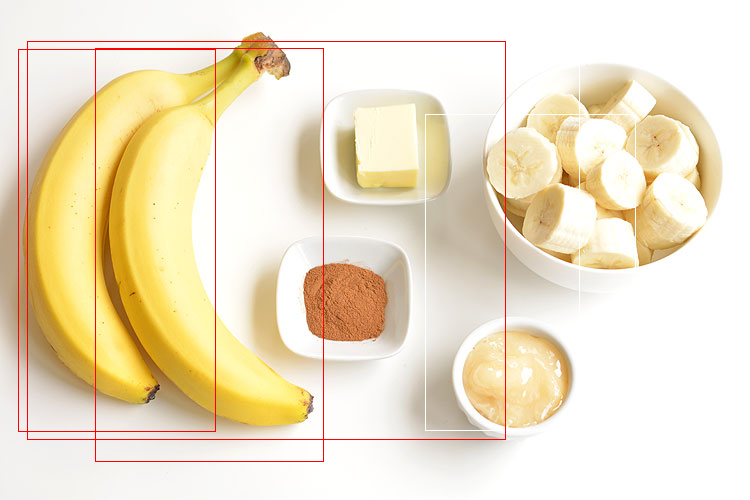

In [23]:
from PIL import ImageDraw

image1 = torchvision.transforms.ToPILImage()(image1) # рисуем по красоте
draw = ImageDraw.Draw(image1)
for box in labels1['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])])
    
for box in pred1['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image1

In [24]:
image2 = val_dataset[50][0] # вытаскиваем (вторую) картинку из тестового датасета с боксами
labels2 = val_dataset[50][1]
pred2 = model(image2.unsqueeze(0).to(device))[0]

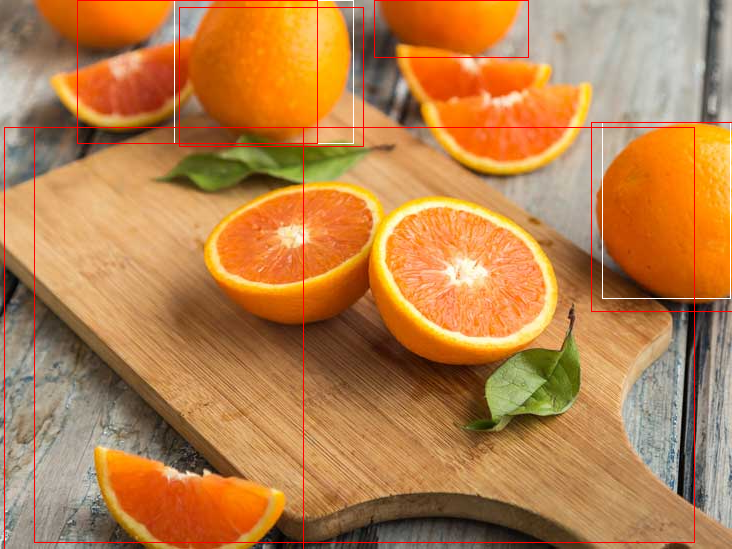

In [25]:
image2 = torchvision.transforms.ToPILImage()(image2) # рисуем по красоте
draw = ImageDraw.Draw(image2)
for box in labels2['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])])
    
for box in pred2['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image2

## Бонус (10 баллов).

__Задание__. В части с классификацией добейтесь accuracy не менее 0.52. Напишите отчёт о проделанных экспериментах.

__Критерии оценки__. Оценка за бонусную часть равна 10, если вы преодолели качество 0.52 и 0 в противном случае.

__Иных оценок кроме 0 и 10 не предусмотрено__.

In [ ]:
# если бы 0.52...... попробую сделать бонус потом

## Бонус (0 баллов).

__Задание 1__. Скиньте ниже смешную картинку, желательно про машинное обучение. На картинке не должно быть никаких упоминаний лектора, семинаристов и ассистентов этого курса.

__Задание 2__. Расскажите, как вам задание? Что понравилось, что не понравилось, что можно улучшить? Мы примем во внимание любой фидбек.